In [215]:
import control
from control import TransferFunction as tf
from control import pole as pole
from control import zero as zero
from control import damp as damp
from control import step_response as step
from control import bode as bode
from control import nyquist_plot as nyquist

from control import matlab

import matplotlib as mpl
from matplotlib.pyplot import plot as plot

import numpy
from numpy import pi as pi

# Filter parameters

In [216]:
f = 100       # Hz
width = 10    # log
depth = -20   # dB

wn = f*2*pi # rad/s

a = width/2
b = control.db2mag(depth)

# Necessary damping to satisfie specs
qsi=b*(1+a**2)/(2*a)


# Transfer Function

In [217]:
s=tf.s

F=((s**2 + 2*qsi*wn*s + wn**2)/(wn**2))*((wn*a)/(s + wn*a))*((wn/a)/(s + wn/a))
print(F)



3.948e+05 s^2 + 2.505e+08 s + 1.559e+11
---------------------------------------
3.948e+05 s^2 + 2.505e+09 s + 1.559e+11



# Bode

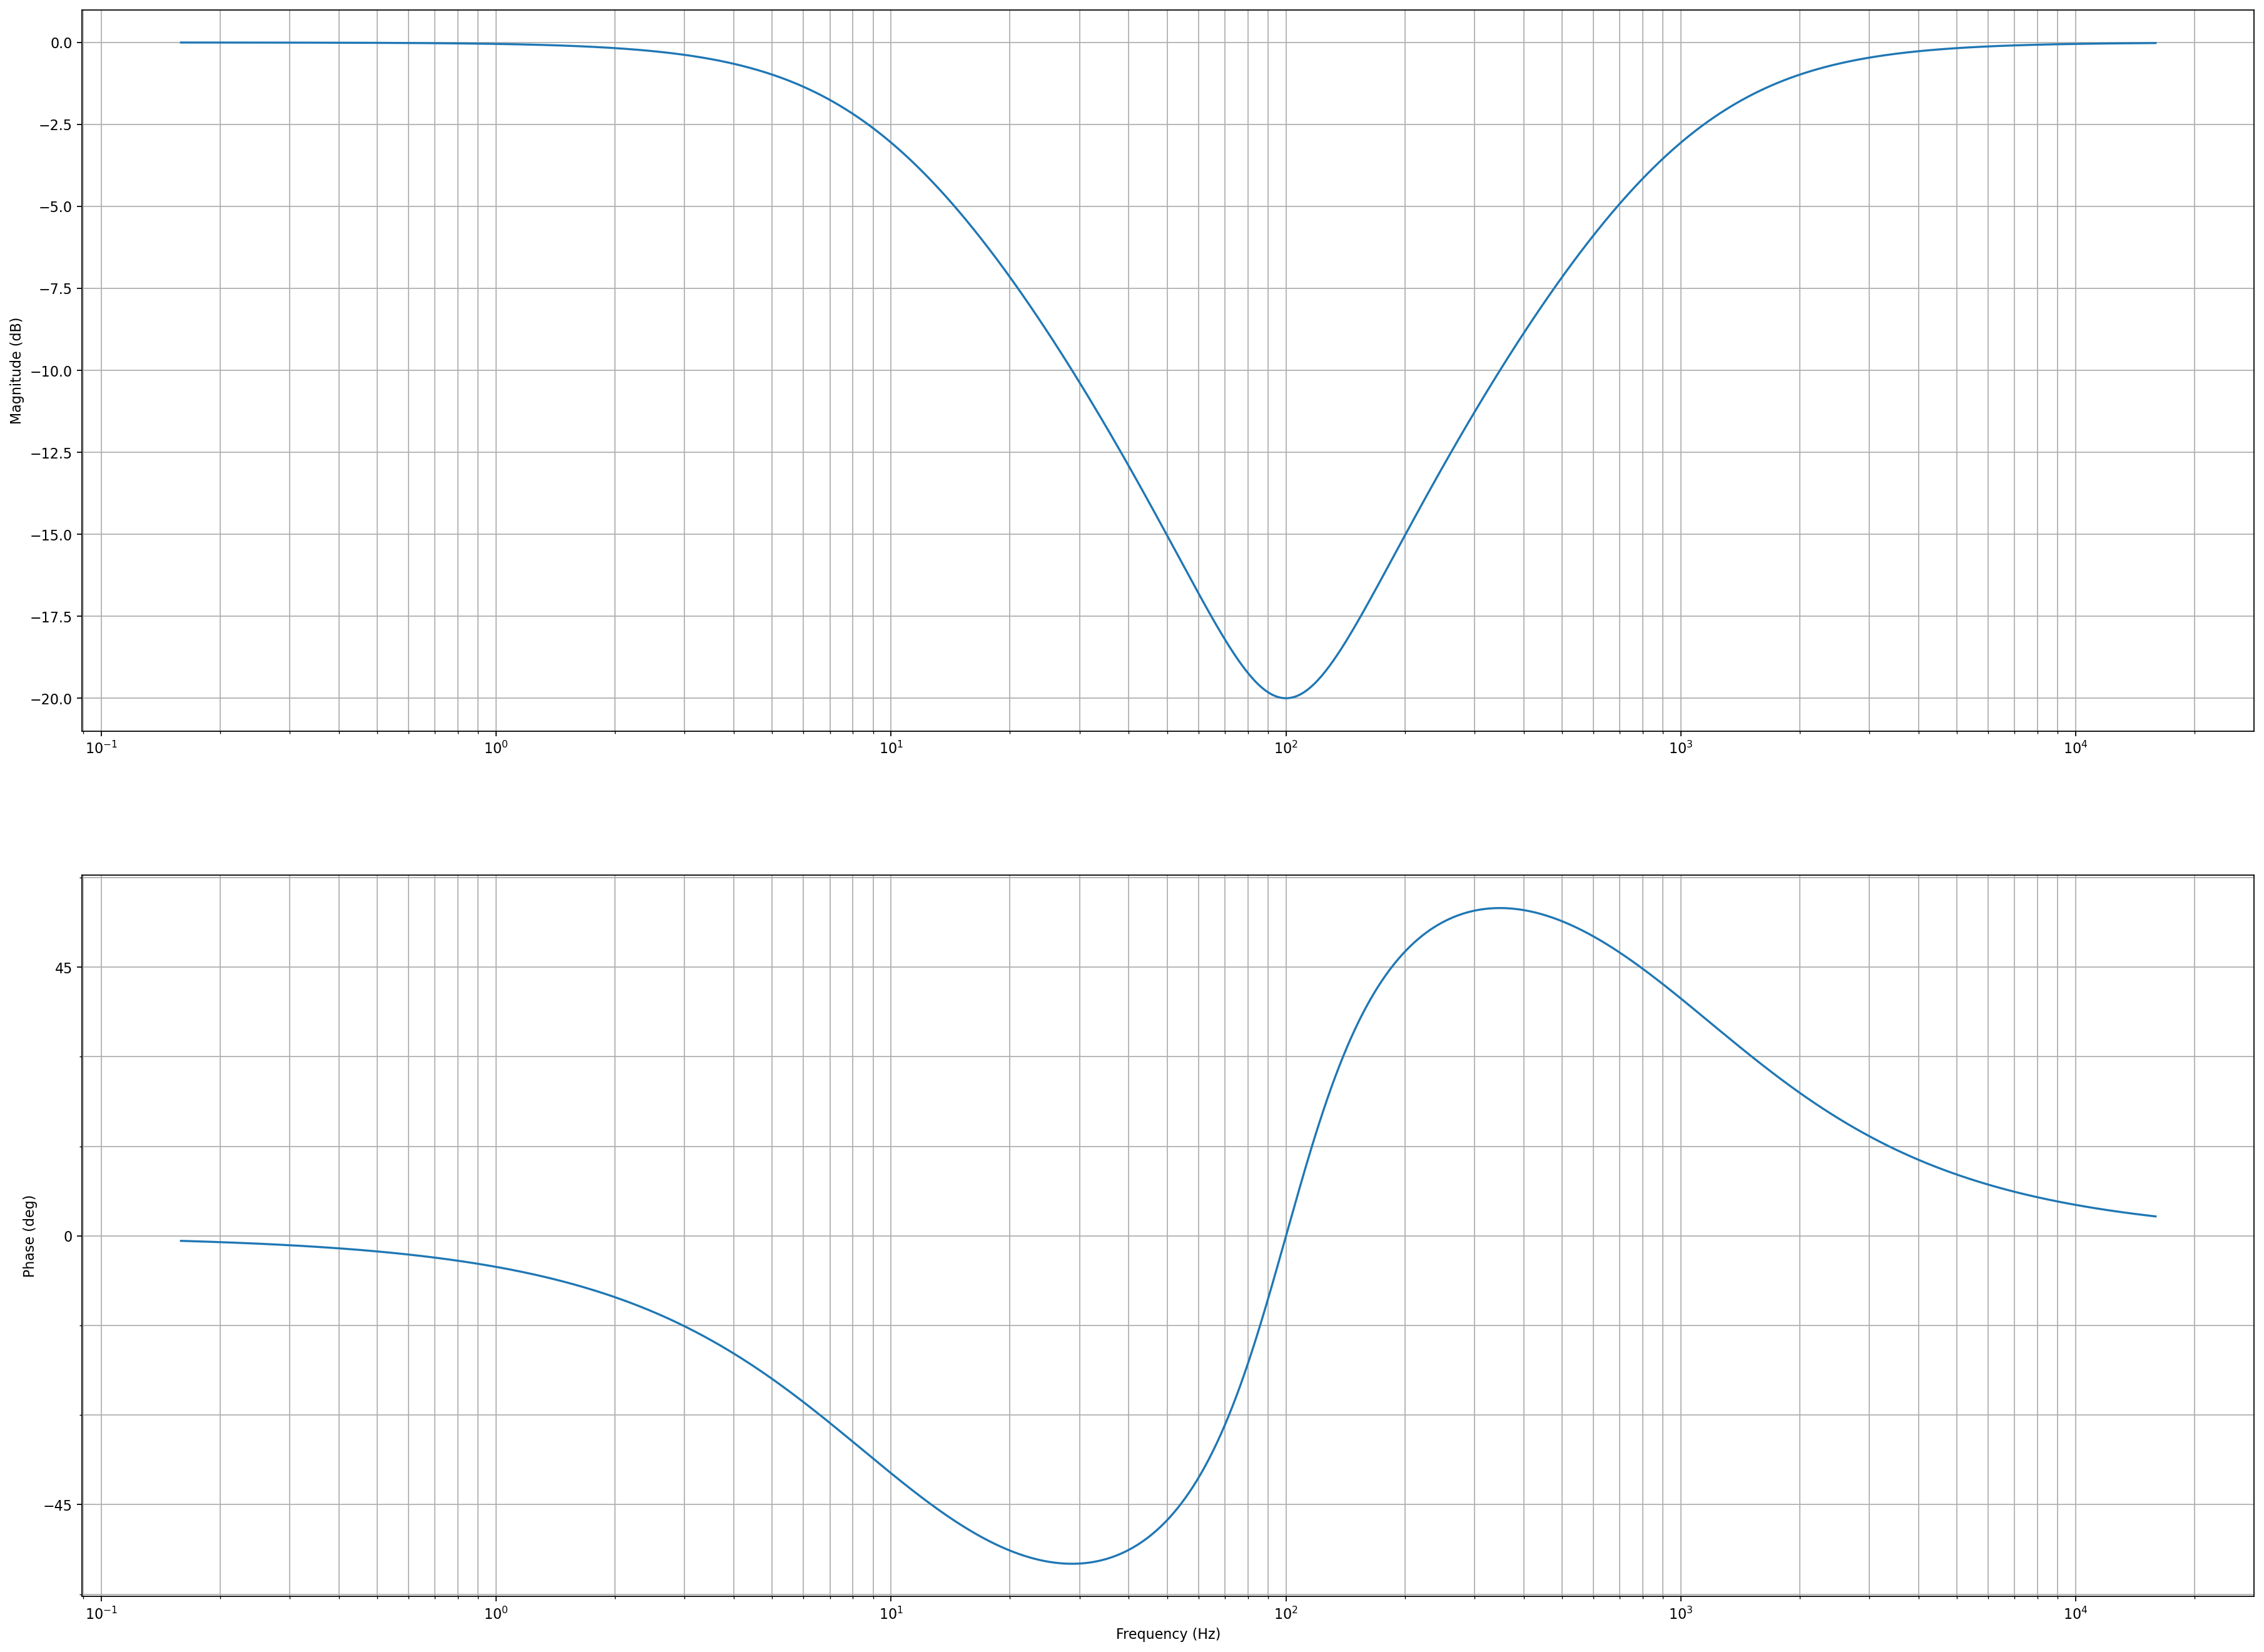

In [218]:
mpl.pyplot.figure(figsize=(28, 21), dpi=160)
mag,phase,omega=control.bode_plot(F,dB=True,Hz=True,plot=True)


# Frequency Response

In [219]:
# fr=f        # Hz
fr= 20      # Hz
w=fr*2*pi

mag,phase,omega=control.freqresp(F,w)
print("Frequency at ",fr," Hz")
print("Magnitude(dB): ", control.mag2db(mag))
print("Phase (deg): ", phase)

Frequency at  20  Hz
Magnitude(dB):  [-7.15786268]
Phase (deg):  [-0.91975482]


# Discrete

## Sampling

In [220]:
Fs = 20e3   # Hz
Ts = 1/Fs   # sec


## ZOH

In [ ]:
F_zoh= control.matlab.c2d(F,Ts)
mag_zoh,phase_zoh,omega_zoh=control.bode_plot(F,dB=True,Hz=False)

print(F_zoh)

mag,phase,omega=control.freqresp(F_zoh,wn)
print("Magnitude(dB): ", control.mag2db(mag))
print("Phase (deg): ", phase)

## Bilinear

In [ ]:
F_bil= control.matlab.c2d(F,Ts,method='bilinear')
mag_bil,phase_bil,omega_bil=control.bode_plot(F,dB=True,Hz=False)

mag,phase,omega=control.freqresp(F_bil,wn)
print("Magnitude(dB): ", control.mag2db(mag))
print("Phase (deg): ", phase)

## Tustin


1.626e+09 z^2 - 3.199e+09 z + 1.575e+09
---------------------------------------
             z^2 + 2 z + 1


1.854e+09 z^2 - 3.199e+09 z + 1.347e+09
---------------------------------------
             z^2 + 2 z + 1

Magnitude(dB):  [0.]
Phase (deg):  [-1.13676579e-12]


D:\Arquivos de Programas\Anaconda3\lib\site-packages\control\xferfcn.py:987: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
D:\Arquivos de Programas\Anaconda3\lib\site-packages\control\lti.py:199: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


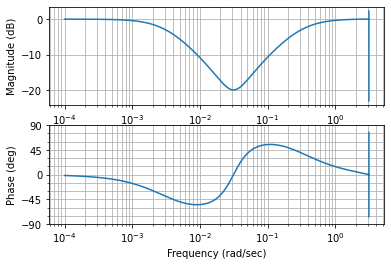

In [231]:
z=tf.z

zeros=zero(F)
poles=pole(F)

tus=(2/Ts)*(z-1)/(z+1)

num = 1
den = 1
for m in zeros:
    num = num * (tus-m)

for n in poles:
    den = den * (tus-n)
print(num)
print(den)

F_tus=num/den

# zeros = zero(num)
# poles = zero(den)
# print(zeros)
# print(poles)

# num = 1
# den = 1
# for m in zeros:
#     num = num * (z-m)

# for n in poles:
#     den = den * (z-n)

# F_tus=num/den
# print(F_tus)

mag_bil,phase_bil,omega_bil=control.bode_plot(F_tus,dB=True,Hz=False)

mag,phase,omega=control.freqresp(F_tus,wn)
print("Magnitude(dB): ", control.mag2db(mag))
print("Phase (deg): ", phase)

## Pre-Warp